In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from numpy import percentile
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
%matplotlib inline
path ="D:\Manvi\Data_Science\Credit_project\creditcard.csv"
data =pd.read_csv(path)
print(data.columns)
print(data.shape)
data.head()


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [80]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [81]:

print(data.dtypes)
data["Class"].unique()#1=fraud,0=genuine according to the kaggle datset description
#x=data.apply(lambda x:dtype(x),axis=0)


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


array([0, 1], dtype=int64)

Percentage of fraud transaction is: 0.1727485630620034
Percentage of valid transaction is: 99.82725143693798
The number of fraud transactions are: 492
The number of valid transactions are: 284315


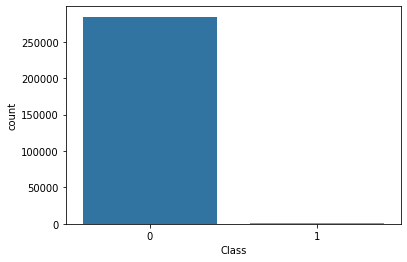

In [82]:
fraud=data[data['Class']==1]
valid=data[data["Class"]==0]
total=len(fraud)+len(valid)
fraud_percent=(len(fraud)/(total))*100
valid_percent=(len(valid)/(total))*100
print("Percentage of fraud transaction is: {}".format(fraud_percent))
print("Percentage of valid transaction is: {}".format(valid_percent))
print("The number of fraud transactions are: {}".format(len(fraud)))
print("The number of valid transactions are: {}".format(len(valid)))
sns.countplot(x="Class",data=data)


Text(0.5, 1.0, 'Transaction amount vs Class')

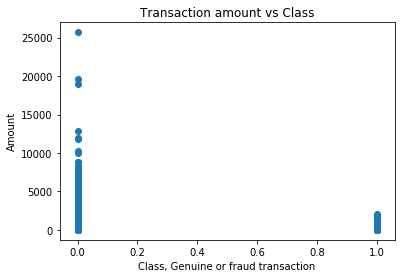

In [83]:
# plot graph bn amount and class
#import matplotlib.pyplot as plt
#%matplotlib inline
plt.scatter(data["Class"],data["Amount"]) 
plt.xlabel("Class, Genuine or fraud transaction")
plt.ylabel("Amount")
plt.title("Transaction amount vs Class")

In [84]:
#Amount detials for fraud transactions :
print("Details of fraud transaction are :\n{}" .format(fraud.Amount.describe()))
#Amount detials for valid transactions :
print()
print("Details of valid transaction are :\n{}" .format(valid.Amount.describe()))


Details of fraud transaction are :
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Details of valid transaction are :
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


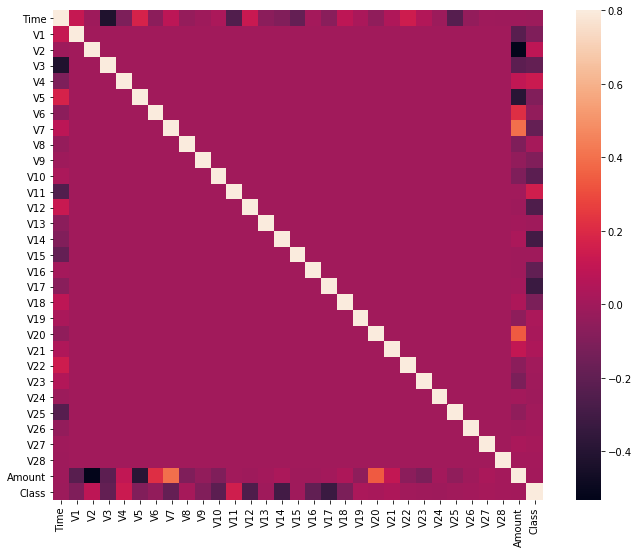

In [85]:
# Correlation matrix 
#import seaborn as sns
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show()

In [86]:
# Data wrangling - checking and cleaing data
data.isnull().head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
pd.get_dummies(data["Class"]).head(10)

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [88]:
x=data.drop(["Class"],axis=1) #independent variables
y=data["Class"] #dependent or target variable/ end goal
print(x.shape)
print(y.shape)
xData=x.values
yData=y.values

(284807, 30)
(284807,)


In [89]:
# Using Skicit-learn to split data into training and testing sets 

# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 42) 


All except logistic model took too long to respond.

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classifiers: 0.9986131104947158 Has a accuracy of
Classifiers: 0.6067415730337079 Has a precision of


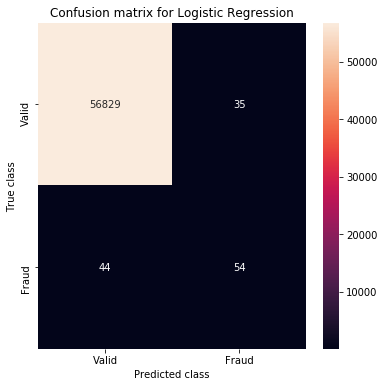

In [90]:


# Logistic Regression 
#log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
model=LogisticRegression()
model.fit(xTrain, yTrain)
# We automatically get the logistic regression with the best parameters.
#log_reg = grid_log_reg.best_estimator_



Pred=model.predict(xTest)
acc = accuracy_score(yTest, Pred) 
print("Classifiers: {} Has a accuracy of".format(acc))
prec = precision_score(yTest, Pred) 
print("Classifiers: {} Has a precision of".format(prec))
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, Pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix for Logistic Regression".format(key)) 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 


Classifiers: 0.9983673326077034 Has a accuracy of
Classifiers: 1.0 Has a precision of


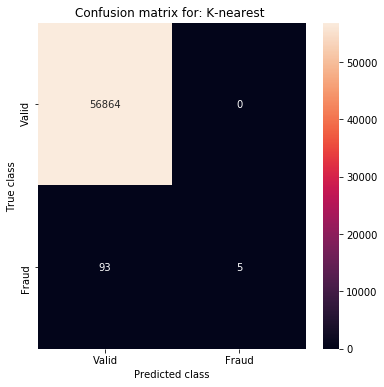

In [91]:
#K-nearest 
#knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
#grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
model_kn=KNeighborsClassifier()
model_kn.fit(xTrain, yTrain)
Pred=model_kn.predict(xTest)
acc = accuracy_score(yTest, Pred) 
print("Classifiers: {} Has a accuracy of".format(acc))
prec = precision_score(yTest, Pred) 
print("Classifiers: {} Has a precision of".format(prec))
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, Pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix for: K-nearest ") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 
#KNears best estimator
#knears_neighbors = grid_knears.best_estimator_


Classifiers: 0.9982795547909132 Has a accuracy of
Classifiers: 0.0 Has a precision of


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


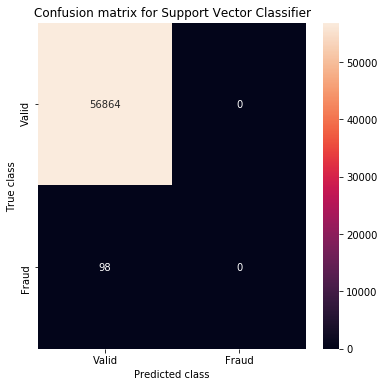

In [92]:
# Support Vector Classifier
model_sv=SVC()
model_sv.fit(xTrain, yTrain)
Pred=model_sv.predict(xTest)
acc = accuracy_score(yTest, Pred) 
print("Classifiers: {} Has a accuracy of".format(acc))
prec = precision_score(yTest, Pred) 
print("Classifiers: {} Has a precision of".format(prec))
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, Pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix for Support Vector Classifier") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

Classifiers: 0.9991748885221726 Has a accuracy of
Classifiers: 0.7383177570093458 Has a precision of


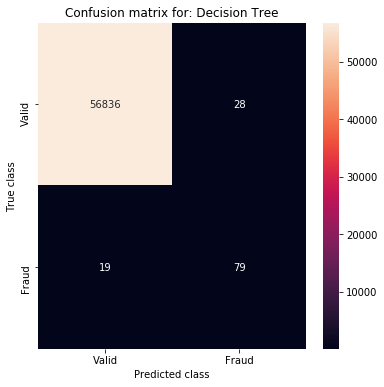

In [93]:
#Decision Tree
model_dec=DecisionTreeClassifier()
model_dec.fit(xTrain, yTrain)
Pred=model_dec.predict(xTest)
acc = accuracy_score(yTest, Pred) 
print("Classifiers: {} Has a accuracy of".format(acc))
prec = precision_score(yTest, Pred) 
print("Classifiers: {} Has a precision of".format(prec))
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, Pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix for: Decision Tree") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 


Using Machine Learning Model on Properly pre processed data:

i.e Skewness, outlier removed and the data is properly sampled

1. PCA Transformation: The dataset description says that all fields except TIME and AMOUNT went through a PCA transformation (Dimensionality Reduction technique).

2. Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)

From Above two we know the data is highly skewed and hence we will have to apply techniques to rid our dataset of named anomaly 

First we ensure all the data columns are normalised specifically the Amount and Time feature 

(0.0, 172792.0)

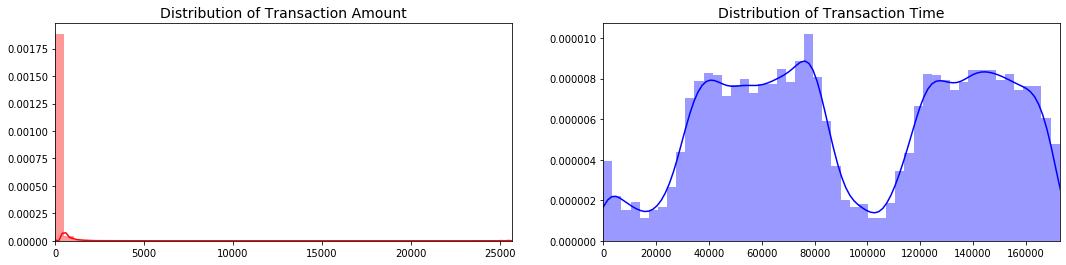

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


In [95]:

rob_scaler = RobustScaler()
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


We want to test our models on the original unedited dataset not on the testing set created by either of these techniques.
Hence we will split our dataset now.

In [96]:

#from sklearn.model_selection import KFold, StratifiedKFold


#sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

X = data.drop('Class', axis=1)
y = data['Class']

#for train_index, test_index in sss.split(X, y):
#    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
#    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
original_Xtrain, original_Xtest,original_ytrain, original_ytest=train_test_split(X, y, random_state=0, stratify=y, shuffle=True)
#xTrain, xTest, yTrain, yTest = train_test_split( 
 #       xData, yData, test_size = 0.2, random_state = 42) 


Now we Under Sample dataset to get equal number of fraud and valid transactions. For this we follow the steps given below:
1 Shuffle the entire dataset using sample function
2 separate out valid and fraud data columns 
3 select equal number of both or undersample valid transaction to only 492
4 concatinate the two

In [97]:
df = data.sample(frac=1, random_state=42)
fraud = df[df.Class == 1]
nonfraud = df[df.Class == 0].sample(n=492, random_state=32)
df_new = pd.concat([fraud, nonfraud])

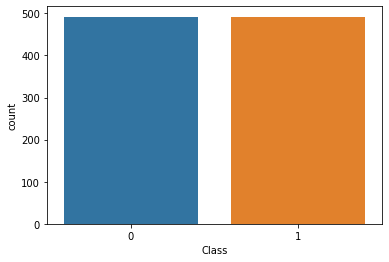

In [98]:
sns.countplot(x="Class",data=df_new)


Now we will understand which features efffect the class value most using a correlation matrix 

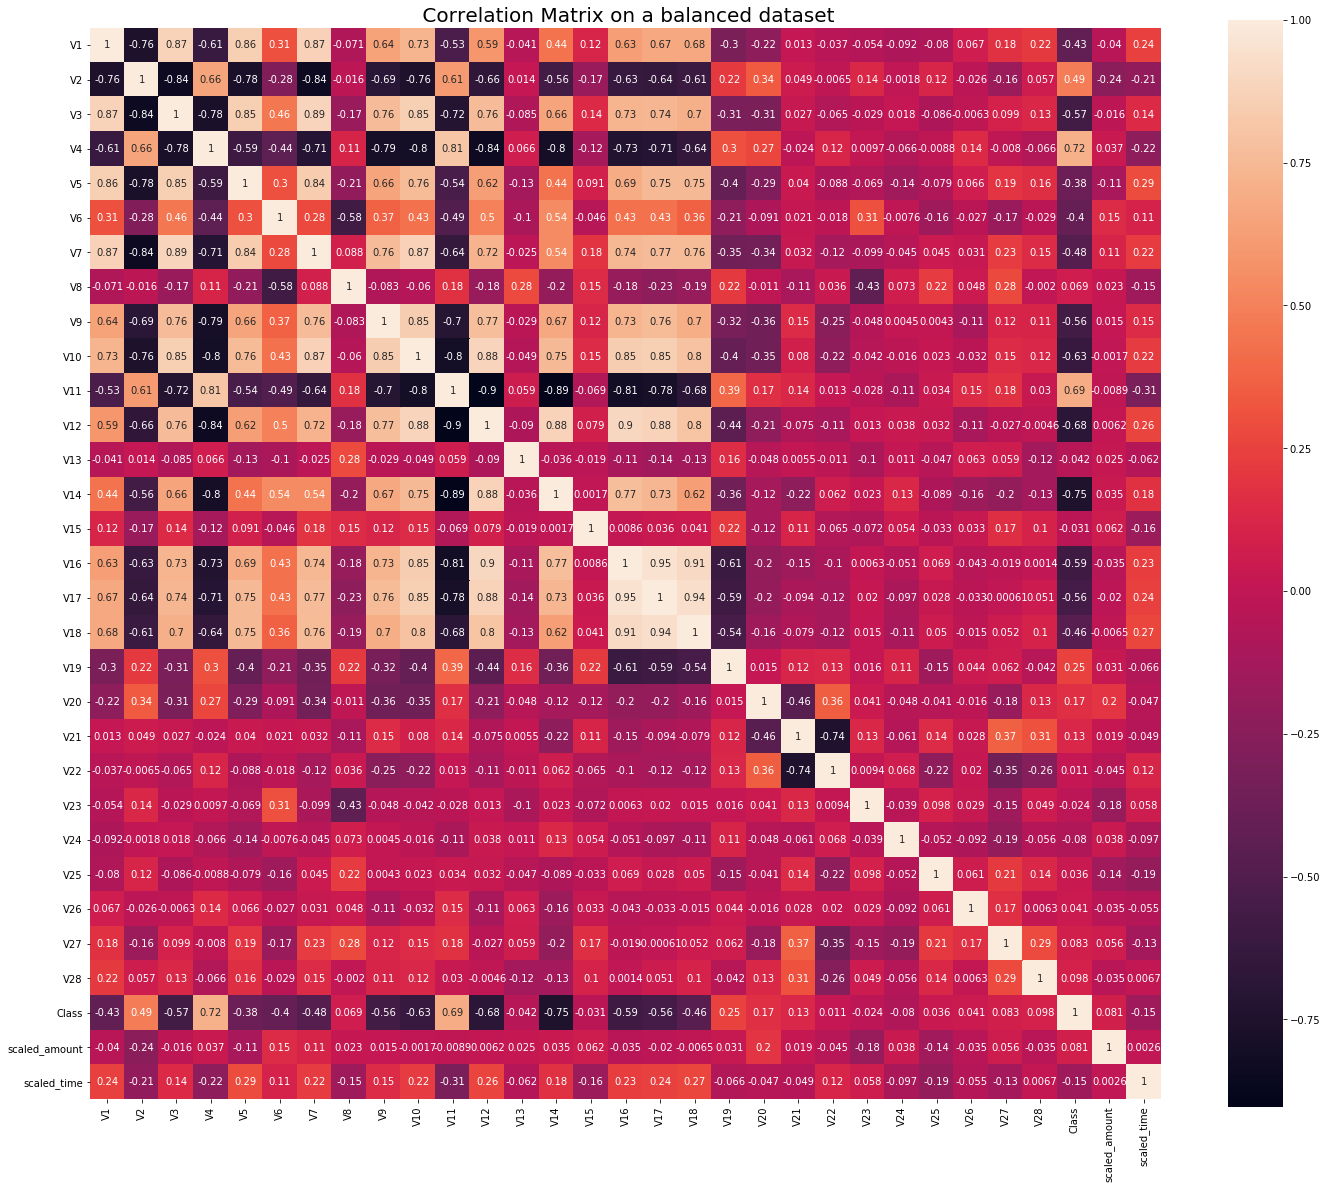

In [99]:
corrmat = df_new.corr() 
fig = plt.figure(figsize = (24, 20)) 
map=sns.heatmap(corrmat, vmax = 1, square = True,annot=True) 
map.set_title(' Correlation Matrix on a balanced dataset', fontsize=20)
plt.show()

NEGATIVE CORRELATION :
 The features V14, V12, V3, V10 are negatively correlated i.e. the more negative the value more chances for transaction to be a fraud.
 
 POSITIVE CORELATION : 
 The features V11, V2, V4 are positively correlated i.e. more positive the values more are the chances for transactions to be a fraud.


Text(0.5, 1.0, 'V10 vs Class for Negative Correlation')

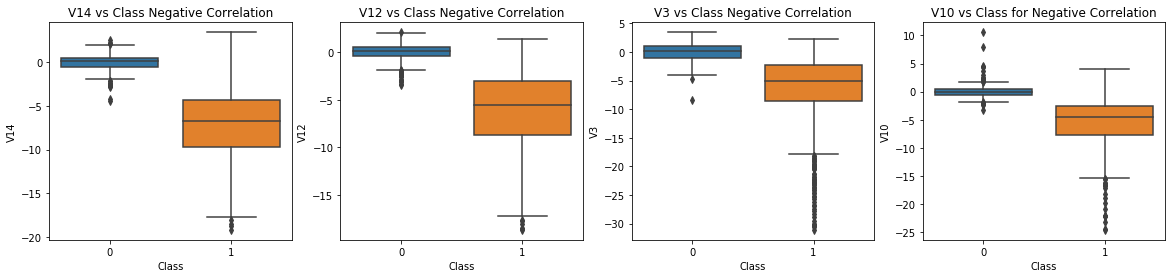

In [100]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y='V14', data=df_new, ax=axes[0])
axes[0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y='V12', data=df_new, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y='V3', data=df_new, ax=axes[2])
axes[2].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y='V10', data=df_new, ax=axes[3])
axes[3].set_title('V10 vs Class for Negative Correlation')

Text(0.5, 1.0, 'V4 vs Class for positive Correlation')

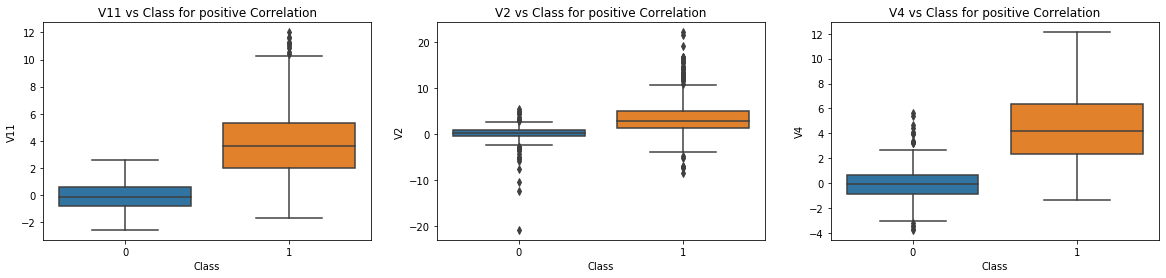

In [101]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y='V11', data=df_new, ax=axes[0])
axes[0].set_title('V11 vs Class for positive Correlation')

sns.boxplot(x="Class", y='V2', data=df_new, ax=axes[1])
axes[1].set_title('V2 vs Class for positive Correlation')

sns.boxplot(x="Class", y='V4', data=df_new, ax=axes[2])
axes[2].set_title('V4 vs Class for positive Correlation')


Now we need to decide on a threshold or value of factor k to remove outliers that lie beyond this value. However we need to be careful so that we do not have a major data loss.

In [102]:
#note that applying outlier reduction directly on entire column will lead to outlier removal in terms of whole column 

v3_class = df_new['V3'].loc[df_new['Class']==1].values
# calculate interquartile range
q25_v3, q75_v3 = percentile(v3_class, 25), percentile(v3_class, 75)
iqr_v3 = q75_v3 - q25_v3
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_v3, q75_v3, iqr_v3))
# calculate the outlier cutoff
cut_off_v3 = iqr_v3 * 1.5
lower_v3, upper_v3 = q25_v3 - cut_off_v3, q75_v3 + cut_off_v3
# identify outliers
outliers_v3 = [x for x in v3_class if x < lower_v3 or x > upper_v3]
print('Identified outliers: %d' % len(outliers_v3))
# remove outliers
outliers_removed_v3 = [x for x in v3_class if x >= lower_v3 and x <= upper_v3]
print('Non-outlier observations: %d' % len(outliers_removed_v3))
df_new = df_new.drop(df_new[(df_new['V3'] > upper_v3) | (df_new['V3'] < lower_v3)].index)
    


v10_class = df_new['V10'].loc[df_new['Class']==1].values
# calculate interquartile range
q25_v10, q75_v10 = percentile(v10_class, 25), percentile(v10_class, 75)
iqr_v10 = q75_v10 - q25_v10
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_v10, q75_v10, iqr_v10))
# calculate the outlier cutoff
cut_off_v10 = iqr_v10 * 1.5
lower_v10, upper_v10 = q25_v10 - cut_off_v10, q75_v10 + cut_off_v10
# identify outliers
outliers_v10 = [x for x in v10_class if x < lower_v10 or x > upper_v10]
print('Identified outliers: %d' % len(outliers_v10))
# remove outliers
outliers_removed_v10 = [x for x in v10_class if x >= lower_v10 and x <= upper_v10]
print('Non-outlier observations: %d' % len(outliers_removed_v10))
df_new = df_new.drop(df_new[(df_new['V10'] > upper_v10) | (df_new['V10'] < lower_v10)].index)
    

v11_class = df_new['V11'].loc[df_new['Class']==1].values
# calculate interquartile range
q25_v11, q75_v11 = percentile(v11_class, 25), percentile(v11_class, 75)
iqr_v11 = q75_v11 - q25_v11
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_v11, q75_v11, iqr_v11))
# calculate the outlier cutoff
cut_off_v11 = iqr_v11 * 1.5
lower_v11, upper_v11 = q25_v11 - cut_off_v11, q75_v11 + cut_off_v11
# identify outliers
outliers_v11 = [x for x in v11_class if x < lower_v11 or x > upper_v11]
print('Identified outliers: %d' % len(outliers_v11))
# remove outliers
outliers_removed_v11 = [x for x in v11_class if x >= lower_v11 and x <= upper_v11]
print('Non-outlier observations: %d' % len(outliers_removed_v11))
df_new = df_new.drop(df_new[(df_new['V11'] > upper_v11) | (df_new['V11'] < lower_v11)].index)

v2_class = df_new['V2'].loc[df_new['Class']==1].values
# calculate interquartile range
q25_v2, q75_v2 = percentile(v2_class, 25), percentile(v2_class, 75)
iqr_v2 = q75_v2 - q25_v2
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_v2, q75_v2, iqr_v2))
# calculate the outlier cutoff
cut_off_v2 = iqr_v2 * 1.5
lower_v2, upper_v2 = q25_v2 - cut_off_v2, q75_v2 + cut_off_v2
# identify outliers
outliers_v2 = [x for x in v2_class if x < lower_v2 or x > upper_v2]
print('Identified outliers: %d' % len(outliers_v2))
# remove outliers
outliers_removed_v2 = [x for x in v2_class if x >= lower_v2 and x <= upper_v2]
print('Non-outlier observations: %d' % len(outliers_removed_v2))
df_new = df_new.drop(df_new[(df_new['V2'] > upper_v2) | (df_new['V2'] < lower_v2)].index)
    
    
    


Percentiles: 25th=-8.643, 75th=-2.276, IQR=6.367
Identified outliers: 53
Non-outlier observations: 439
Percentiles: 25th=-6.240, 75th=-2.260, IQR=3.981
Identified outliers: 37
Non-outlier observations: 402
Percentiles: 25th=1.606, 75th=4.435, IQR=2.829
Identified outliers: 10
Non-outlier observations: 392
Percentiles: 25th=0.965, 75th=3.334, IQR=2.369
Identified outliers: 25
Non-outlier observations: 367


Text(0.5, 1.0, 'V11 vs Class for positive Correlation')

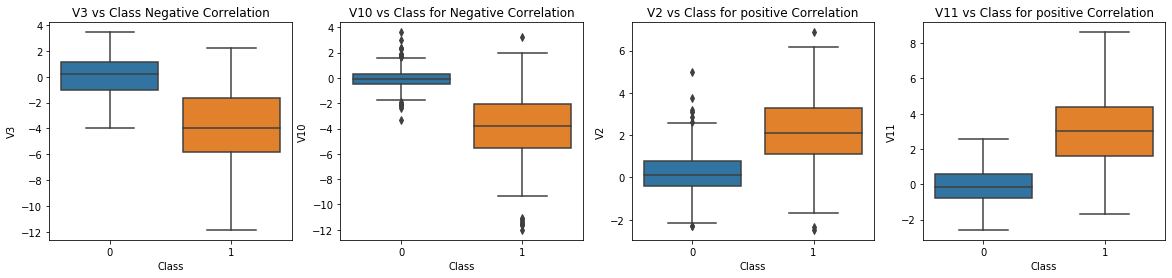

In [103]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class", y='V3', data=df_new, ax=axes[0])
axes[0].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y='V10', data=df_new, ax=axes[1])
axes[1].set_title('V10 vs Class for Negative Correlation')

sns.boxplot(x="Class", y='V2', data=df_new, ax=axes[2])
axes[2].set_title('V2 vs Class for positive Correlation')

sns.boxplot(x="Class", y='V11', data=df_new, ax=axes[3])
axes[3].set_title('V11 vs Class for positive Correlation')


In [104]:
from sklearn.decomposition import PCA

X = df_new.drop('Class', axis=1)
y = df_new['Class']

X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)


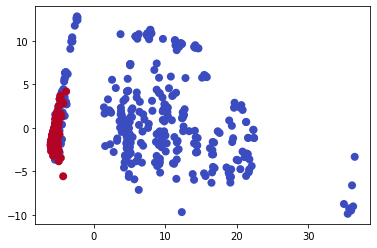

In [105]:
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1],c=(y == 0), cmap='coolwarm',label='No Fraud', linewidths=2)

In [106]:
X = df_new.drop('Class', axis=1)
y = df_new['Class']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [108]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [109]:


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


In [110]:


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: {} Has a training score of".format(key), round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers: LogisiticRegression Has a training score of 94.0 % accuracy score
Classifiers: KNearest Has a training score of 94.0 % accuracy score
Classifiers: Support Vector Classifier Has a training score of 94.0 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of 92.0 % accuracy score


In [111]:


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

#K-nearest 
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\anaconda3\lib\site-packages\skle

Classifiers: 0.9415465857700627 Has a accuracy of
Classifiers: 0.026272577996715927 Has a precision of


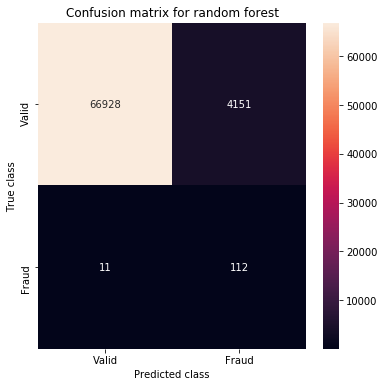

Classifiers: 0.9600853908598073 Has a accuracy of
Classifiers: 0.03774226453587215 Has a precision of


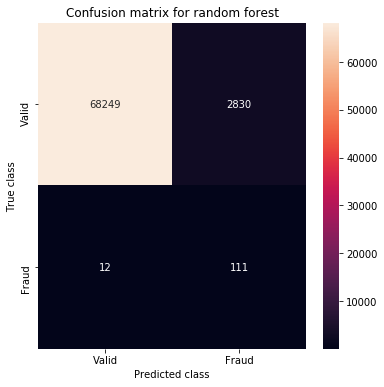

Classifiers: 0.9511390129490744 Has a accuracy of
Classifiers: 0.03102291783119061 Has a precision of


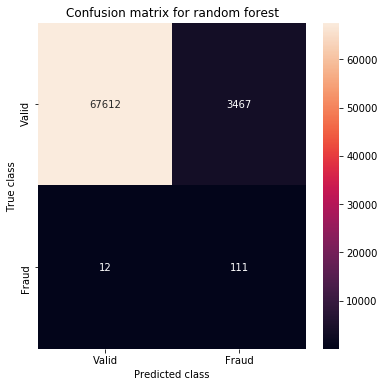

Classifiers: 0.8829105923990899 Has a accuracy of
Classifiers: 0.014194464158977998 Has a precision of


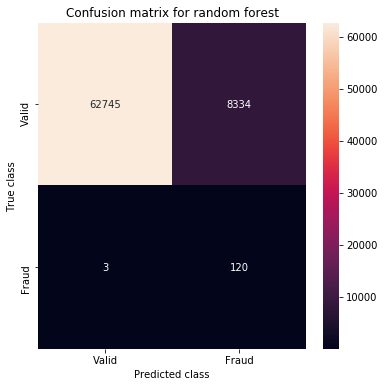

In [112]:
#original_Xtest
#original_ytest
for key, classifier in classifiers.items():
    Pred=classifier.predict(original_Xtest)
    acc = accuracy_score(original_ytest, Pred) 
    print("Classifiers: {} Has a accuracy of".format(acc))
    prec = precision_score(original_ytest, Pred) 
    print("Classifiers: {} Has a precision of".format(prec))
    LABELS = ['Valid', 'Fraud'] 
    conf_matrix = confusion_matrix(original_ytest, Pred) 
    plt.figure(figsize =(6, 6)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS,  
                yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix for random forest") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show() 
